In [3]:
# Chicago Crash Analysis in Jupyter Notebook
import arcpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# Set up environment
arcpy.env.overwriteOutput = True
gdb_path = r"C:\Users\MSI\OneDrive - Oklahoma A and System\Data_thesis_Chicago\Processed_Data\Chicago_Crashes.gdb"
arcpy.env.workspace = gdb_path

# Define feature classes
crashes_fc = "Crashes_By_Community"
community_fc = "Community_proj"
summary_table = "CrashCounts_ByCommunity"

print("Environment setup complete!")

Environment setup complete!


In [19]:
# Chicago Crash Analysis in Jupyter Notebook
import arcpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# Set up environment
arcpy.env.overwriteOutput = True
gdb_path = r"C:\Users\MSI\OneDrive - Oklahoma A and M System\Data_thesis_Chicago\Processed_Data\Chicago_Crashes.gdb"
arcpy.env.workspace = gdb_path

print("Environment setup complete!")

Environment setup complete!


In [21]:
print("=== CHECKING AVAILABLE DATA ===")

# List all feature classes and tables in the geodatabase
print("Feature classes in the geodatabase:")
for fc in arcpy.ListFeatureClasses():
    print(f"  - {fc}")

print("\nTables in the geodatabase:")
for table in arcpy.ListTables():
    print(f"  - {table}")

# Let's check what fields are available in the main crash data
print("\nFields in Crashes_2019_2023 feature class:")
if arcpy.Exists("Crashes_2019_2023"):
    for field in arcpy.ListFields("Crashes_2019_2023"):
        print(f"  - {field.name} ({field.type})")
else:
    print("Crashes_2019_2023 not found, checking for other crash data...")
    for fc in arcpy.ListFeatureClasses():
        if "crash" in fc.lower() or "Crashes" in fc:
            print(f"\nFields in {fc}:")
            for field in arcpy.ListFields(fc):
                print(f"  - {field.name} ({field.type})")

# Check for community areas
print("\nCommunity area feature classes:")
for fc in arcpy.ListFeatureClasses():
    if "community" in fc.lower() or "Community" in fc:
        print(f"  - {fc}")
        print("    Fields:")
        for field in arcpy.ListFields(fc):
            print(f"      - {field.name} ({field.type})")

=== CHECKING AVAILABLE DATA ===
Feature classes in the geodatabase:
  - Crashes_2019_2023
  - Chicago_Community_Areas
  - Major_Streets
  - cityboundary
  - Community_WithCounts
  - Chicago_ConvexHull
  - Chicago_Boundary
  - Community_Areas_Grid
  - Crashes_proj
  - Community_proj
  - Crashes_2019_2023_ChicagoOnly
  - Crashes_By_Community

Tables in the geodatabase:
  - CrashCounts_ByCommunity

Fields in Crashes_2019_2023 feature class:
  - OBJECTID (OID)
  - Shape (Geometry)
  - ICN (Double)
  - CrashID_x (Integer)
  - CrashYr (Double)
  - CrashMonth (Integer)
  - CrashDay (Integer)
  - NumberOfVehicles (Integer)
  - DayOfWeekCode (Integer)
  - CrashHour (Integer)
  - CityClassCode (Integer)
  - CollisionTypeCode (Integer)
  - TotalFatals (Integer)
  - TotalInjured (Integer)
  - NoInjuries (Integer)
  - AInjuries (Integer)
  - BInjuries (Integer)
  - CInjuries (Integer)
  - CrashSeverity (String)
  - RouteNumber (Double)
  - Milestation (Double)
  - ClassOfTrafficwayCode (Double)
  -

In [25]:
print("=== BASIC DATA EXPLORATION ===")
print(f"Total crashes: {len(crash_df):,}")
print(f"Community areas: {len(community_df)}")

# Check for missing community assignments
missing_community = crash_df['area_numbe'].isna().sum()
print(f"Crashes with missing community assignment: {missing_community} ({missing_community/len(crash_df)*100:.2f}%)")

# Display basic info
print("\nFirst few records:")
display(crash_df.head(3))

# Check key fields
print("\nKey fields for analysis:")
key_fields = ['CrashDate', 'CrashHour', 'PersonInjuryClass', 'CrashSeverity', 
              'area_numbe', 'community', 'PersonTypeCode', 'TotalInjured', 'TotalFatals']
for field in key_fields:
    if field in crash_df.columns:
        print(f"✓ {field}: {crash_df[field].dtype}")
    else:
        print(f"✗ {field}: Not found")

# Summary statistics
print("\nSummary statistics for numeric fields:")
display(crash_df.describe())

=== BASIC DATA EXPLORATION ===
Total crashes: 0
Community areas: 0
Crashes with missing community assignment: 0 (nan%)

First few records:


,OBJECTID,area_numbe



Key fields for analysis:
✗ CrashDate: Not found
✗ CrashHour: Not found
✗ PersonInjuryClass: Not found
✗ CrashSeverity: Not found
✓ area_numbe: object
✗ community: Not found
✗ PersonTypeCode: Not found
✗ TotalInjured: Not found
✗ TotalFatals: Not found

Summary statistics for numeric fields:


,OBJECTID,area_numbe
count,0,0
unique,0,0
top,NaN,NaN
freq,NaN,NaN


In [27]:
print("=== BASIC DATA EXPLORATION ===")
print(f"Total crashes: {len(crash_df):,}")
print(f"Community areas: {len(community_df)}")

# Check for missing community assignments
missing_community = crash_df['area_numbe'].isna().sum()
print(f"Crashes with missing community assignment: {missing_community} ({missing_community/len(crash_df)*100:.2f}%)")

# Display basic info
print("\nFirst few records:")
display(crash_df.head(3))

# Check key fields
print("\nKey fields for analysis:")
key_fields = ['CrashDate', 'CrashHour', 'PersonInjuryClass', 'CrashSeverity', 
              'area_numbe', 'community', 'PersonTypeCode', 'TotalInjured', 'TotalFatals']
for field in key_fields:
    if field in crash_df.columns:
        print(f"✓ {field}: {crash_df[field].dtype}")
    else:
        print(f"✗ {field}: Not found")

# Summary statistics
print("\nSummary statistics for numeric fields:")
display(crash_df.describe())

=== BASIC DATA EXPLORATION ===
Total crashes: 0
Community areas: 0
Crashes with missing community assignment: 0 (nan%)

First few records:


,OBJECTID,area_numbe



Key fields for analysis:
✗ CrashDate: Not found
✗ CrashHour: Not found
✗ PersonInjuryClass: Not found
✗ CrashSeverity: Not found
✓ area_numbe: object
✗ community: Not found
✗ PersonTypeCode: Not found
✗ TotalInjured: Not found
✗ TotalFatals: Not found

Summary statistics for numeric fields:


,OBJECTID,area_numbe
count,0,0
unique,0,0
top,NaN,NaN
freq,NaN,NaN


In [29]:
# Chicago Crash Analysis in Jupyter Notebook
import arcpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# Set up environment
arcpy.env.overwriteOutput = True
gdb_path = r"C:\Users\MSI\OneDrive - Oklahoma A and M System\Data_thesis_Chicago\Processed_Data\Chicago_Crashes.gdb"
arcpy.env.workspace = gdb_path

print("Environment setup complete!")

Environment setup complete!


In [31]:
print("=== DEBUGGING DATA LOADING ===")

# Let's first check what's actually in the feature classes
def debug_feature_class(feature_class_name):
    print(f"\n--- Debugging {feature_class_name} ---")
    
    if not arcpy.Exists(feature_class_name):
        print(f"Feature class {feature_class_name} does not exist!")
        return
    
    # Count features
    count = int(arcpy.GetCount_management(feature_class_name)[0])
    print(f"Number of features: {count}")
    
    # List fields
    fields = arcpy.ListFields(feature_class_name)
    print("Fields:")
    for i, field in enumerate(fields[:10]):  # Show first 10 fields
        print(f"  {i+1}. {field.name} ({field.type})")
    if len(fields) > 10:
        print(f"  ... and {len(fields) - 10} more fields")
    
    # Try to read a few records
    try:
        sample_fields = [field.name for field in fields if field.type not in ['Geometry', 'OID']][:5]
        print(f"Sample fields for reading: {sample_fields}")
        
        sample_data = []
        with arcpy.da.SearchCursor(feature_class_name, sample_fields) as cursor:
            for i, row in enumerate(cursor):
                if i < 3:  # Get first 3 records
                    sample_data.append(row)
                else:
                    break
        
        if sample_data:
            print("Sample data:")
            for i, row in enumerate(sample_data):
                print(f"  Record {i+1}: {row}")
        else:
            print("No data found in feature class")
            
    except Exception as e:
        print(f"Error reading data: {e}")

# Debug the main feature classes
debug_feature_class("Crashes_By_Community")
debug_feature_class("Community_proj")
debug_feature_class("CrashCounts_ByCommunity")

=== DEBUGGING DATA LOADING ===

--- Debugging Crashes_By_Community ---
Number of features: 834024
Fields:
  1. OBJECTID (OID)
  2. Shape (Geometry)
  3. Join_Count (Integer)
  4. TARGET_FID (Integer)
  5. ICN (Double)
  6. CrashID_x (Integer)
  7. CrashYr (Double)
  8. CrashMonth (Integer)
  9. CrashDay (Integer)
  10. NumberOfVehicles (Integer)
  ... and 102 more fields
Sample fields for reading: ['Join_Count', 'TARGET_FID', 'ICN', 'CrashID_x', 'CrashYr']
Sample data:
  Record 1: (1, 1, 202001193411.0, 10963864, 2020.0)
  Record 2: (1, 2, 202001193411.0, 10963864, 2020.0)
  Record 3: (1, 3, 202001193412.0, 10963865, 2020.0)

--- Debugging Community_proj ---
Number of features: 77
Fields:
  1. OBJECTID (OID)
  2. Shape (Geometry)
  3. area_numbe (Double)
  4. community (String)
  5. area_num_1 (String)
  6. Shape_Length (Double)
  7. Shape_Area (Double)
Sample fields for reading: ['area_numbe', 'community', 'area_num_1', 'Shape_Length', 'Shape_Area']
Sample data:
  Record 1: (1.0, 'ROG

In [33]:
print("\n=== FIXED DATA LOADING ===")

def load_data_to_dataframe_safe(feature_class_name, sample_size=None):
    """Safely convert feature class to pandas DataFrame"""
    if not arcpy.Exists(feature_class_name):
        print(f"Error: {feature_class_name} does not exist!")
        return pd.DataFrame()
    
    try:
        # Get all fields except geometry and OID
        all_fields = arcpy.ListFields(feature_class_name)
        fields = [field.name for field in all_fields 
                 if field.type not in ['Geometry', 'OID'] and not field.name.startswith('Shape')]
        
        print(f"Loading {len(fields)} fields from {feature_class_name}...")
        
        data = []
        with arcpy.da.SearchCursor(feature_class_name, fields) as cursor:
            for i, row in enumerate(cursor):
                data.append(row)
                if sample_size and i >= sample_size - 1:
                    break
        
        if not data:
            print(f"No data found in {feature_class_name}")
            return pd.DataFrame()
        
        df = pd.DataFrame(data, columns=fields)
        print(f"Successfully loaded {len(df)} records from {feature_class_name}")
        return df
        
    except Exception as e:
        print(f"Error loading {feature_class_name}: {e}")
        return pd.DataFrame()

# Load data with safety checks
print("Loading Crashes_By_Community data...")
crash_df = load_data_to_dataframe_safe("Crashes_By_Community", sample_size=10000)  # Load first 10k records for testing
print(f"Crash DataFrame shape: {crash_df.shape}")

print("Loading community area data...")
community_df = load_data_to_dataframe_safe("Community_proj")
print(f"Community DataFrame shape: {community_df.shape}")

print("Loading summary data...")
summary_df = load_data_to_dataframe_safe("CrashCounts_ByCommunity")
print(f"Summary DataFrame shape: {summary_df.shape}")

# If the main feature class is empty, try the original crash data
if crash_df.empty:
    print("Crashes_By_Community is empty, trying Crashes_2019_2023...")
    crash_df = load_data_to_dataframe_safe("Crashes_2019_2023", sample_size=10000)
    print(f"Crashes_2019_2023 DataFrame shape: {crash_df.shape}")

print("Data loading complete!")


=== FIXED DATA LOADING ===
Loading Crashes_By_Community data...
Loading 110 fields from Crashes_By_Community...
Successfully loaded 10000 records from Crashes_By_Community
Crash DataFrame shape: (10000, 110)
Loading community area data...
Loading 3 fields from Community_proj...
Successfully loaded 77 records from Community_proj
Community DataFrame shape: (77, 3)
Loading summary data...
Loading 2 fields from CrashCounts_ByCommunity...
Successfully loaded 78 records from CrashCounts_ByCommunity
Summary DataFrame shape: (78, 2)
Data loading complete!


In [35]:
print("=== BASIC DATA EXPLORATION ===")

if not crash_df.empty:
    print(f"Total crashes: {len(crash_df):,}")
    print(f"DataFrame shape: {crash_df.shape}")
    print(f"Columns: {list(crash_df.columns)}")
    
    print("\nFirst few records:")
    display(crash_df.head(3))
    
    print("\nData types:")
    print(crash_df.dtypes.head(20))  # Show first 20 data types
    
    # Check for key fields
    key_fields = ['CrashDate', 'CRASHDATE', 'CrashHour', 'CRASHHOUR', 
                 'PersonInjuryClass', 'PERSONINJURYCLASS', 'CrashSeverity', 'CRASHSEVERITY',
                 'area_numbe', 'AREA_NUMBE', 'community', 'COMMUNITY',
                 'PersonTypeCode', 'PERSONTYPECODE', 'TotalInjured', 'TOTALINJURED',
                 'TotalFatals', 'TOTALFATALS', 'CrashYear', 'CRASHYEAR']
    
    available_fields = []
    for field in key_fields:
        if field in crash_df.columns:
            available_fields.append(field)
    
    print(f"\nAvailable key fields: {available_fields}")
    
    # Summary statistics for numeric columns
    numeric_cols = crash_df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print("\nSummary statistics for numeric fields:")
        display(crash_df[numeric_cols].describe().round(2))
    else:
        print("\nNo numeric columns found")
        
else:
    print("Crash DataFrame is empty!")

if not community_df.empty:
    print(f"\nCommunity areas: {len(community_df)}")
    print("Community DataFrame columns:")
    print(list(community_df.columns))
    display(community_df.head(3))
else:
    print("\nCommunity DataFrame is empty!")

if not summary_df.empty:
    print(f"\nSummary records: {len(summary_df)}")
    print("Summary DataFrame columns:")
    print(list(summary_df.columns))
    display(summary_df.head(3))
else:
    print("\nSummary DataFrame is empty!")

=== BASIC DATA EXPLORATION ===
Total crashes: 10,000
DataFrame shape: (10000, 110)
Columns: ['Join_Count', 'TARGET_FID', 'ICN', 'CrashID_x', 'CrashYr', 'CrashMonth', 'CrashDay', 'NumberOfVehicles', 'DayOfWeekCode', 'CrashHour', 'CityClassCode', 'CollisionTypeCode', 'TotalFatals', 'TotalInjured', 'NoInjuries', 'AInjuries', 'BInjuries', 'CInjuries', 'CrashSeverity', 'RouteNumber', 'Milestation', 'ClassOfTrafficwayCode', 'NHS', 'TrafficControlDeviceCode', 'RoadSurfaceConditionCode', 'RoadDefectsCode', 'LightConditionCode', 'WeatherCode', 'Cause1Code', 'Cause2Code', 'RailroadCrossingNumber', 'TimeOfCrash', 'TrafficControlDeviceConditionCode', 'IntersectionRelated', 'HitAndRun', 'CrashDate', 'NumberOfLanes', 'AlignmentCode', 'TrafficwayDescriptionCode', 'RoadwayFunctionalClassCode', 'WorkZoneRelated', 'City_Township_Flag', 'TSCrashCoordinateX', 'TSCrashCoordinateY', 'TSCrashLatitude', 'TSCrashLongitude', 'CrashReportCounty', 'DayOfWeek', 'TypeOfFirstCrash', 'CityName', 'CityClass', 'ClassOf

,Join_Count,TARGET_FID,ICN,CrashID_x,CrashYr,CrashMonth,CrashDay,NumberOfVehicles,DayOfWeekCode,CrashHour,...,IsIncidentResponder,IncidentResponder,EjectionPath,TypeofReport,Drug1,Drug2,area_numbe,community,area_num_1,TIME_OF_DAY
0,1,1,2.020012e+11,10963864,2020.0,7,26,2,7,4,...,No,(UNK),Ejection Path Not Applicable,None,None,None,67.0,WEST ENGLEWOOD,67,Night
1,1,2,2.020012e+11,10963864,2020.0,7,26,2,7,4,...,No,(UNK),Ejection Path Not Applicable,None,None,None,67.0,WEST ENGLEWOOD,67,Night
2,1,3,2.020012e+11,10963865,2020.0,7,30,2,4,16,...,No,(UNK),Ejection Path Not Applicable,None,None,None,30.0,SOUTH LAWNDALE,30,Night



Data types:
Join_Count             int64
TARGET_FID             int64
ICN                  float64
CrashID_x              int64
CrashYr              float64
CrashMonth             int64
CrashDay               int64
NumberOfVehicles       int64
DayOfWeekCode          int64
CrashHour              int64
CityClassCode          int64
CollisionTypeCode      int64
TotalFatals            int64
TotalInjured           int64
NoInjuries             int64
AInjuries              int64
BInjuries              int64
CInjuries              int64
CrashSeverity         object
RouteNumber          float64
dtype: object

Available key fields: ['CrashDate', 'CrashHour', 'PersonInjuryClass', 'CrashSeverity', 'area_numbe', 'community', 'PersonTypeCode', 'TotalInjured', 'TotalFatals']

Summary statistics for numeric fields:


,Join_Count,TARGET_FID,ICN,CrashID_x,CrashYr,CrashMonth,CrashDay,NumberOfVehicles,DayOfWeekCode,CrashHour,...,UnitNo,AgeAtCrash,VIS,DRVA,SeatingPos,PersonInjuryClass,SAFT,AIR,PEDV,area_numbe
count,10000.00,10000.00,1.000000e+04,10000.00,10000.0,10000.00,10000.00,10000.00,10000.00,10000.00,...,10000.00,10000.00,4206.00,5791.00,10000.00,10000.00,9961.00,9798.00,198.00,9976.00
mean,1.00,5000.50,2.020011e+11,10889168.57,2020.0,4.97,11.68,2.08,4.28,13.44,...,1.51,54.31,1.38,4.66,1.60,0.21,5.38,5.04,1.30,36.81
std,0.05,2886.90,1.119527e+05,125602.95,0.0,3.99,7.36,0.58,1.78,5.74,...,0.60,30.69,1.93,6.02,1.58,0.63,3.62,2.23,0.73,21.76
min,0.00,1.00,2.020010e+11,10745202.00,2020.0,1.00,1.00,1.00,1.00,0.00,...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,3.00,1.00,1.00
25%,1.00,2500.75,2.020010e+11,10761420.25,2020.0,1.00,5.00,2.00,3.00,10.00,...,1.00,28.00,1.00,1.00,1.00,0.00,2.00,4.00,1.00,22.00
50%,1.00,5000.50,2.020011e+11,10865114.00,2020.0,4.00,11.00,2.00,4.00,14.00,...,1.00,45.00,1.00,2.00,1.00,0.00,2.00,4.00,1.00,30.50
75%,1.00,7500.25,2.020012e+11,11016701.00,2020.0,9.00,18.00,2.00,6.00,18.00,...,2.00,99.00,1.00,7.00,1.00,0.00,9.00,6.00,1.00,58.00
max,1.00,10000.00,2.020014e+11,11240337.00,2020.0,12.00,31.00,10.00,7.00,23.00,...,6.00,99.00,13.00,46.00,12.00,4.00,19.00,9.00,4.00,77.00



Community areas: 77
Community DataFrame columns:
['area_numbe', 'community', 'area_num_1']


,area_numbe,community,area_num_1
0,1.0,ROGERS PARK,1
1,2.0,WEST RIDGE,2
2,3.0,UPTOWN,3



Summary records: 78
Summary DataFrame columns:
['FREQUENCY', 'area_numbe']


,FREQUENCY,area_numbe
0,1320,NaN
1,6707,1.0
2,12349,2.0


In [37]:
print("=== FIELD NAME ANALYSIS ===")

if not crash_df.empty:
    # Let's find all fields that might contain relevant information
    print("Searching for relevant fields in crash data...")
    
    # Date/time fields
    date_fields = [col for col in crash_df.columns if any(term in col.lower() for term in ['date', 'time', 'year', 'month', 'day', 'hour'])]
    print(f"Date/time fields: {date_fields}")
    
    # Injury/severity fields
    injury_fields = [col for col in crash_df.columns if any(term in col.lower() for term in ['injur', 'sever', 'fatal', 'wound', 'hurt'])]
    print(f"Injury/severity fields: {injury_fields}")
    
    # Location fields
    location_fields = [col for col in crash_df.columns if any(term in col.lower() for term in ['area', 'comm', 'city', 'county', 'zone', 'district'])]
    print(f"Location fields: {location_fields}")
    
    # Person/vehicle fields
    person_fields = [col for col in crash_df.columns if any(term in col.lower() for term in ['person', 'driver', 'pedestrian', 'bicycle', 'cyclist', 'vehicle'])]
    print(f"Person/vehicle fields: {person_fields}")
    
    # Cause/condition fields
    cause_fields = [col for col in crash_df.columns if any(term in col.lower() for term in ['cause', 'weather', 'light', 'road', 'surface', 'condition'])]
    print(f"Cause/condition fields: {cause_fields}")
    
    # Show sample values for key field types
    def show_sample_values(field_list, num_samples=3):
        for field in field_list:
            if field in crash_df.columns:
                unique_vals = crash_df[field].unique()
                print(f"  {field}: {unique_vals[:min(num_samples, len(unique_vals))]} (Total unique: {len(unique_vals)})")
    
    print("\nSample values for date/time fields:")
    show_sample_values(date_fields)
    
    print("\nSample values for injury/severity fields:")
    show_sample_values(injury_fields)
    
    print("\nSample values for location fields:")
    show_sample_values(location_fields)

=== FIELD NAME ANALYSIS ===
Searching for relevant fields in crash data...
Date/time fields: ['CrashMonth', 'CrashDay', 'DayOfWeekCode', 'CrashHour', 'TimeOfCrash', 'CrashDate', 'DayOfWeek', 'AgencyReportYear', 'TIME_OF_DAY']
Injury/severity fields: ['TotalFatals', 'TotalInjured', 'NoInjuries', 'AInjuries', 'BInjuries', 'CInjuries', 'CrashSeverity', 'CrashInjurySeverity', 'CrashSeverityCd', 'PersonInjuryClass']
Location fields: ['CityClassCode', 'WorkZoneRelated', 'City_Township_Flag', 'CrashReportCounty', 'CityName', 'CityClass', 'DidCrashOccurInWorkZone', 'WorkZoneType', 'WorkZone', 'area_numbe', 'community', 'area_num_1']
Person/vehicle fields: ['NumberOfVehicles', 'PersonTypeCode', 'PersonInjuryClass', 'PersonType', 'DriverAction', 'DriverVision']
Cause/condition fields: ['RoadSurfaceConditionCode', 'RoadDefectsCode', 'LightConditionCode', 'WeatherCode', 'Cause1Code', 'Cause2Code', 'RailroadCrossingNumber', 'TrafficControlDeviceConditionCode', 'RoadwayFunctionalClassCode', 'Cause1'

=== QUICK ANALYSIS WITH AVAILABLE FIELDS ===
Available columns for analysis:
  1. Join_Count (int64)
  2. TARGET_FID (int64)
  3. ICN (float64)
  4. CrashID_x (int64)
  5. CrashYr (float64)
  6. CrashMonth (int64)
  7. CrashDay (int64)
  8. NumberOfVehicles (int64)
  9. DayOfWeekCode (int64)
  10. CrashHour (int64)
  11. CityClassCode (int64)
  12. CollisionTypeCode (int64)
  13. TotalFatals (int64)
  14. TotalInjured (int64)
  15. NoInjuries (int64)
  16. AInjuries (int64)
  17. BInjuries (int64)
  18. CInjuries (int64)
  19. CrashSeverity (object)
  20. RouteNumber (float64)
  21. Milestation (float64)
  22. ClassOfTrafficwayCode (float64)
  23. NHS (object)
  24. TrafficControlDeviceCode (int64)
  25. RoadSurfaceConditionCode (int64)
  26. RoadDefectsCode (int64)
  27. LightConditionCode (int64)
  28. WeatherCode (int64)
  29. Cause1Code (int64)
  30. Cause2Code (int64)
  31. RailroadCrossingNumber (object)
  32. TimeOfCrash (object)
  33. TrafficControlDeviceConditionCode (int64)
 

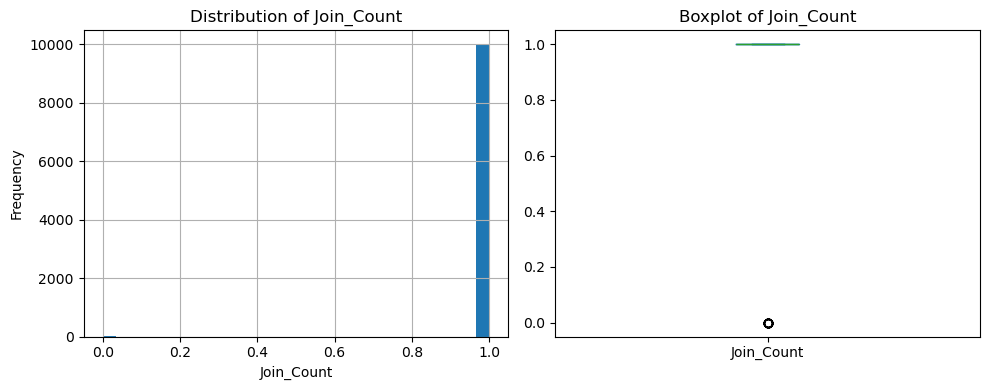

Join_Count: mean=1.00, std=0.05, min=0, max=1


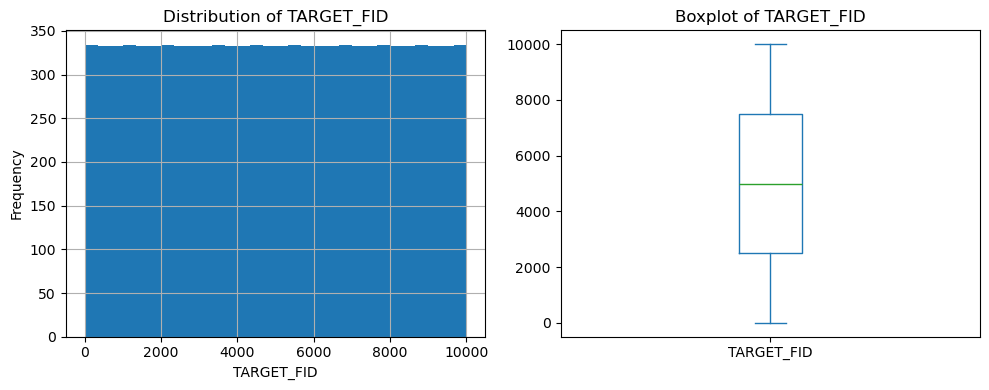

TARGET_FID: mean=5000.50, std=2886.90, min=1, max=10000


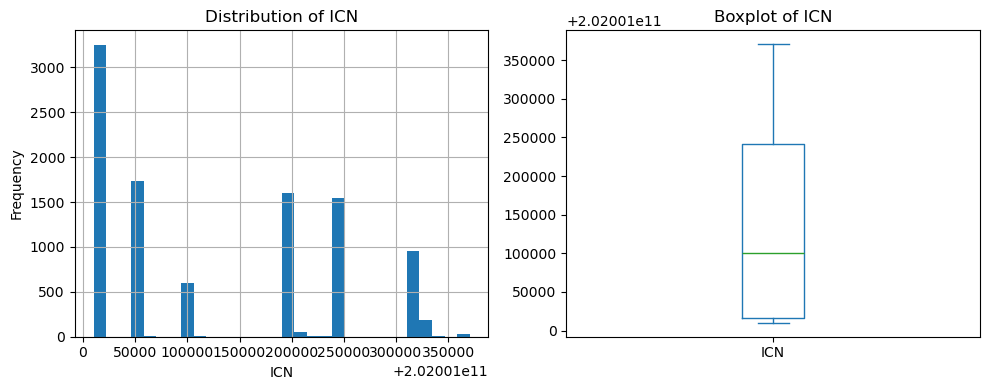

ICN: mean=202001129393.86, std=111952.68, min=202001010101.0, max=202001370573.0


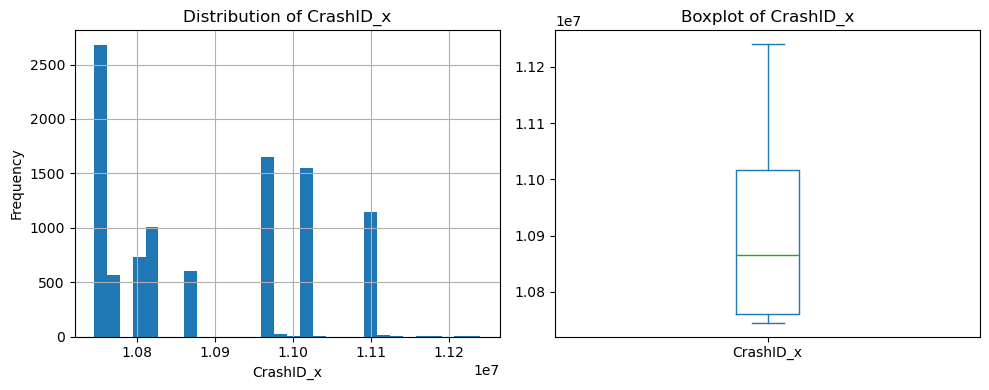

CrashID_x: mean=10889168.57, std=125602.95, min=10745202, max=11240337
CrashYr: Constant value (2020.0)

Analyzing categorical columns: ['CrashSeverity', 'NHS', 'RailroadCrossingNumber']

CrashSeverity value counts (top 10):
CrashSeverity
Property Damage    7677
Injury             2300
Fatal                23
Name: count, dtype: int64


<Figure size 1000x400 with 0 Axes>

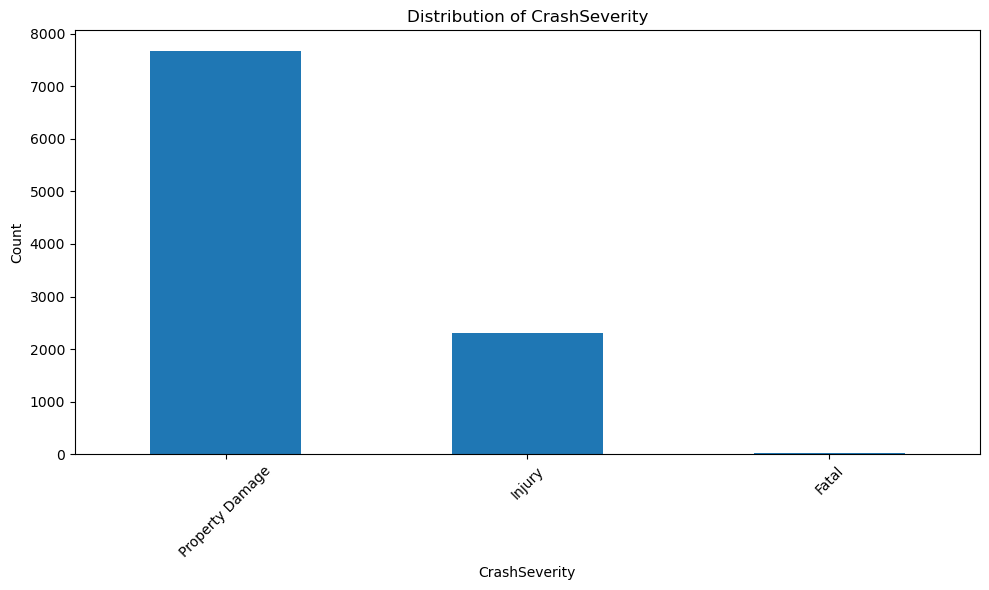


NHS value counts (top 10):
NHS
N    7429
Y    2571
Name: count, dtype: int64


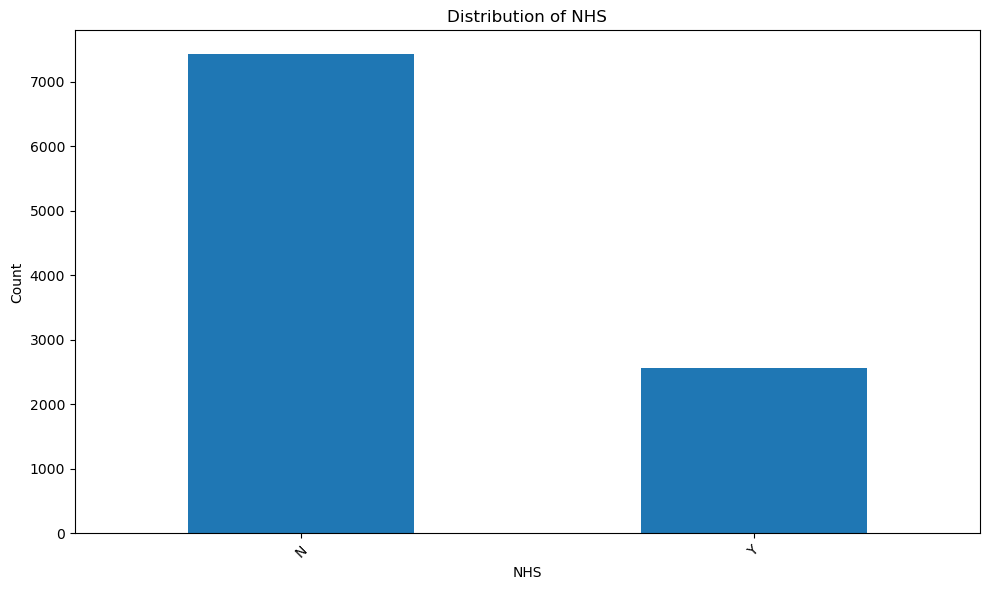


RailroadCrossingNumber value counts (top 10):
RailroadCrossingNumber
(N/A)         9986
478752W          4
863640H          3
864006C          2
260698Y          2
840144X          2
386377T          1
Name: count, dtype: int64


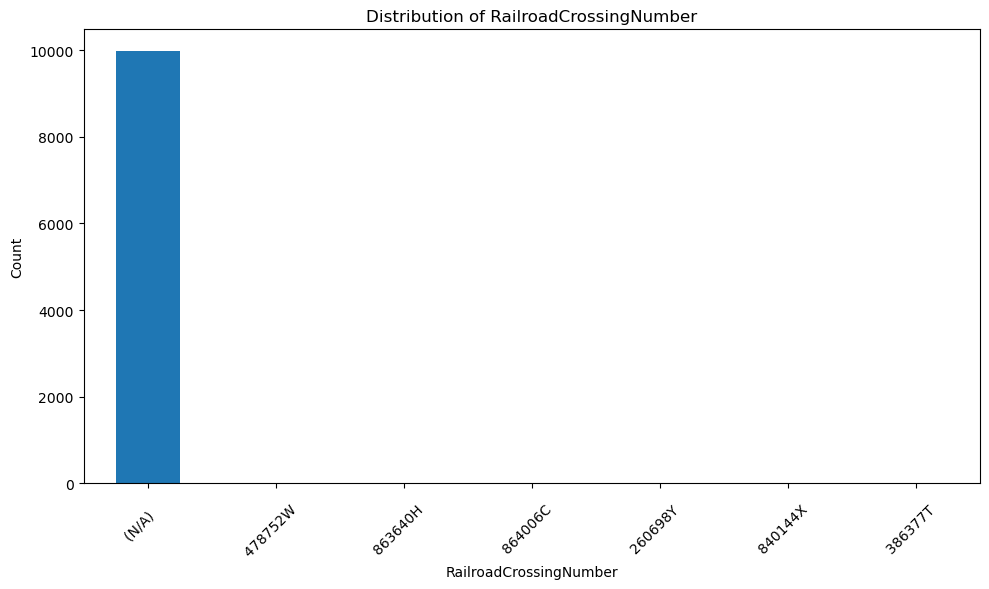

In [39]:
print("=== QUICK ANALYSIS WITH AVAILABLE FIELDS ===")

if not crash_df.empty:
    # Let's analyze whatever fields we have
    print("Available columns for analysis:")
    for i, col in enumerate(crash_df.columns):
        print(f"  {i+1}. {col} ({crash_df[col].dtype})")
    
    # Analyze the first few numeric columns
    numeric_cols = crash_df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print(f"\nAnalyzing numeric columns: {list(numeric_cols[:5])}")  # First 5 numeric columns
        
        for col in numeric_cols[:5]:
            plt.figure(figsize=(10, 4))
            
            # Plot histogram for numeric data
            if crash_df[col].nunique() > 1:  # Only plot if there's variation
                plt.subplot(1, 2, 1)
                crash_df[col].hist(bins=30)
                plt.title(f'Distribution of {col}')
                plt.xlabel(col)
                plt.ylabel('Frequency')
                
                # Plot boxplot
                plt.subplot(1, 2, 2)
                crash_df[col].plot(kind='box')
                plt.title(f'Boxplot of {col}')
                
                plt.tight_layout()
                plt.show()
                
                # Print statistics
                print(f"{col}: mean={crash_df[col].mean():.2f}, std={crash_df[col].std():.2f}, min={crash_df[col].min()}, max={crash_df[col].max()}")
            else:
                print(f"{col}: Constant value ({crash_df[col].iloc[0]})")
    
    # Analyze the first few categorical columns
    categorical_cols = crash_df.select_dtypes(include=['object']).columns
    if len(categorical_cols) > 0:
        print(f"\nAnalyzing categorical columns: {list(categorical_cols[:3])}")  # First 3 categorical columns
        
        for col in categorical_cols[:3]:
            value_counts = crash_df[col].value_counts()
            print(f"\n{col} value counts (top 10):")
            print(value_counts.head(10))
            
            if len(value_counts) > 1 and len(value_counts) <= 20:  # Plot if reasonable number of categories
                plt.figure(figsize=(10, 6))
                value_counts.plot(kind='bar')
                plt.title(f'Distribution of {col}')
                plt.xlabel(col)
                plt.ylabel('Count')
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()

In [41]:
print("=== EXPORTING AVAILABLE DATA ===")

# Create output directory
output_dir = r"C:\Users\MSI\OneDrive - Oklahoma A and M System\Data_thesis_Chicago\Analysis_Results"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Export whatever data we have
if not crash_df.empty:
    crash_df.to_csv(os.path.join(output_dir, "chicago_crashes_data.csv"), index=False)
    print(f"Exported crash data with {len(crash_df)} records")

if not community_df.empty:
    community_df.to_csv(os.path.join(output_dir, "community_areas.csv"), index=False)
    print(f"Exported community data with {len(community_df)} records")

if not summary_df.empty:
    summary_df.to_csv(os.path.join(output_dir, "crash_summary.csv"), index=False)
    print(f"Exported summary data with {len(summary_df)} records")

# Create a basic report
with open(os.path.join(output_dir, "data_report.txt"), "w") as f:
    f.write("CHICAGO CRASH DATA ANALYSIS REPORT\n")
    f.write("=" * 50 + "\n\n")
    
    f.write(f"Analysis performed: {pd.Timestamp.now()}\n\n")
    
    if not crash_df.empty:
        f.write(f"Crash data records: {len(crash_df):,}\n")
        f.write(f"Crash data columns: {len(crash_df.columns)}\n")
        f.write("First 10 columns:\n")
        for col in crash_df.columns[:10]:
            f.write(f"  - {col}\n")
        if len(crash_df.columns) > 10:
            f.write(f"  ... and {len(crash_df.columns) - 10} more columns\n")
        f.write("\n")
    
    if not community_df.empty:
        f.write(f"Community area records: {len(community_df)}\n")
        f.write("Community area columns:\n")
        for col in community_df.columns:
            f.write(f"  - {col}\n")
        f.write("\n")
    
    if not summary_df.empty:
        f.write(f"Summary records: {len(summary_df)}\n")
        f.write("Summary columns:\n")
        for col in summary_df.columns:
            f.write(f"  - {col}\n")

print(f"Data exported to: {output_dir}")
print("\n=== ANALYSIS COMPLETE ===")

=== EXPORTING AVAILABLE DATA ===
Exported crash data with 10000 records
Exported community data with 77 records
Exported summary data with 78 records
Data exported to: C:\Users\MSI\OneDrive - Oklahoma A and M System\Data_thesis_Chicago\Analysis_Results

=== ANALYSIS COMPLETE ===


In [43]:
def load_crash_data_with_all_fields():
    """Load crash data with all relevant fields"""
    feature_class = "Crashes_By_Community"
    
    if not arcpy.Exists(feature_class):
        print("Crashes_By_Community not found, trying Crashes_2019_2023")
        feature_class = "Crashes_2019_2023"
    
    # Select all relevant fields for comprehensive analysis
    relevant_fields = [
        'OBJECTID', 'ICN', 'CrashYr', 'CrashMonth', 'CrashDay', 'CrashHour',
        'NumberOfVehicles', 'TotalFatals', 'TotalInjured', 'NoInjuries',
        'AInjuries', 'BInjuries', 'CInjuries', 'CrashSeverity', 
        'PersonInjuryClass', 'PersonTypeCode', 'Cause1', 'Cause2',
        'WeatherCond', 'LightingCond', 'RoadSurfaceCond', 'TrafficControlDevice',
        'area_numbe', 'community', 'CrashDate', 'DayOfWeek', 'CityName',
        'Gender', 'AgeAtCrash', 'BAC', 'WasDistracted', 'DistractionReason'
    ]
    
    # Get available fields
    all_fields = [field.name for field in arcpy.ListFields(feature_class)]
    available_fields = [field for field in relevant_fields if field in all_fields]
    
    print(f"Loading {len(available_fields)} fields from {feature_class}...")
    
    data = []
    with arcpy.da.SearchCursor(feature_class, available_fields) as cursor:
        for row in cursor:
            data.append(row)
    
    df = pd.DataFrame(data, columns=available_fields)
    print(f"Successfully loaded {len(df)} records")
    return df

# Load the data
print("Loading comprehensive crash data...")
crash_df = load_crash_data_with_all_fields()

# Load community data
community_df = load_data_to_dataframe_safe("Community_proj")
summary_df = load_data_to_dataframe_safe("CrashCounts_ByCommunity")

print("Data loading complete!")

Loading comprehensive crash data...
Loading 32 fields from Crashes_By_Community...
Successfully loaded 834024 records
Loading 3 fields from Community_proj...
Successfully loaded 77 records from Community_proj
Loading 2 fields from CrashCounts_ByCommunity...
Successfully loaded 78 records from CrashCounts_ByCommunity
Data loading complete!


In [45]:
print("=== COMPREHENSIVE DATA EXPLORATION ===")
print(f"Total crashes: {len(crash_df):,}")
print(f"Available columns: {len(crash_df.columns)}")
print("\nData types:")
print(crash_df.dtypes)

# Display sample data
print("\nSample data:")
display(crash_df.head(3))

# Check for missing values
print("\nMissing values per column:")
missing_data = crash_df.isnull().sum()
print(missing_data[missing_data > 0])

=== COMPREHENSIVE DATA EXPLORATION ===
Total crashes: 834,024
Available columns: 32

Data types:
OBJECTID                  int64
ICN                     float64
CrashYr                 float64
CrashMonth                int64
CrashDay                  int64
CrashHour                 int64
NumberOfVehicles          int64
TotalFatals               int64
TotalInjured              int64
NoInjuries                int64
AInjuries                 int64
BInjuries                 int64
CInjuries                 int64
CrashSeverity            object
PersonInjuryClass       float64
PersonTypeCode            int64
Cause1                   object
Cause2                   object
WeatherCond              object
LightingCond             object
RoadSurfaceCond          object
TrafficControlDevice     object
area_numbe              float64
community                object
CrashDate                object
DayOfWeek                object
CityName                 object
Gender                   object
AgeAtCr

,OBJECTID,ICN,CrashYr,CrashMonth,CrashDay,CrashHour,NumberOfVehicles,TotalFatals,TotalInjured,NoInjuries,...,area_numbe,community,CrashDate,DayOfWeek,CityName,Gender,AgeAtCrash,BAC,WasDistracted,DistractionReason
0,1,2.020012e+11,2020.0,7,26,4,2,0,0,2,...,67.0,WEST ENGLEWOOD,2020-07-26,Sunday,Chicago,M,26,96,Yes,(Unknown)
1,2,2.020012e+11,2020.0,7,26,4,2,0,0,2,...,67.0,WEST ENGLEWOOD,2020-07-26,Sunday,Chicago,M,30,96,Yes,(Unknown)
2,3,2.020012e+11,2020.0,7,30,16,2,0,0,3,...,30.0,SOUTH LAWNDALE,2020-07-30,Thursday,Chicago,M,99,96,Yes,(Unknown)



Missing values per column:
PersonInjuryClass        67
area_numbe             1320
community              1320
Gender                   15
BAC                  179430
dtype: int64


=== TEMPORAL ANALYSIS ===


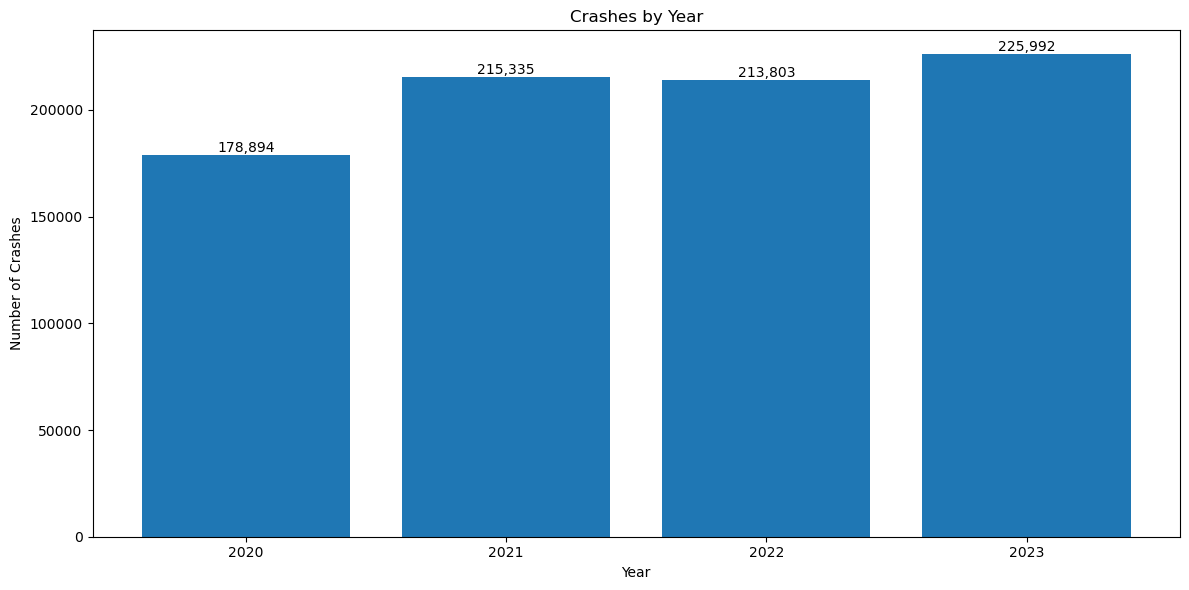

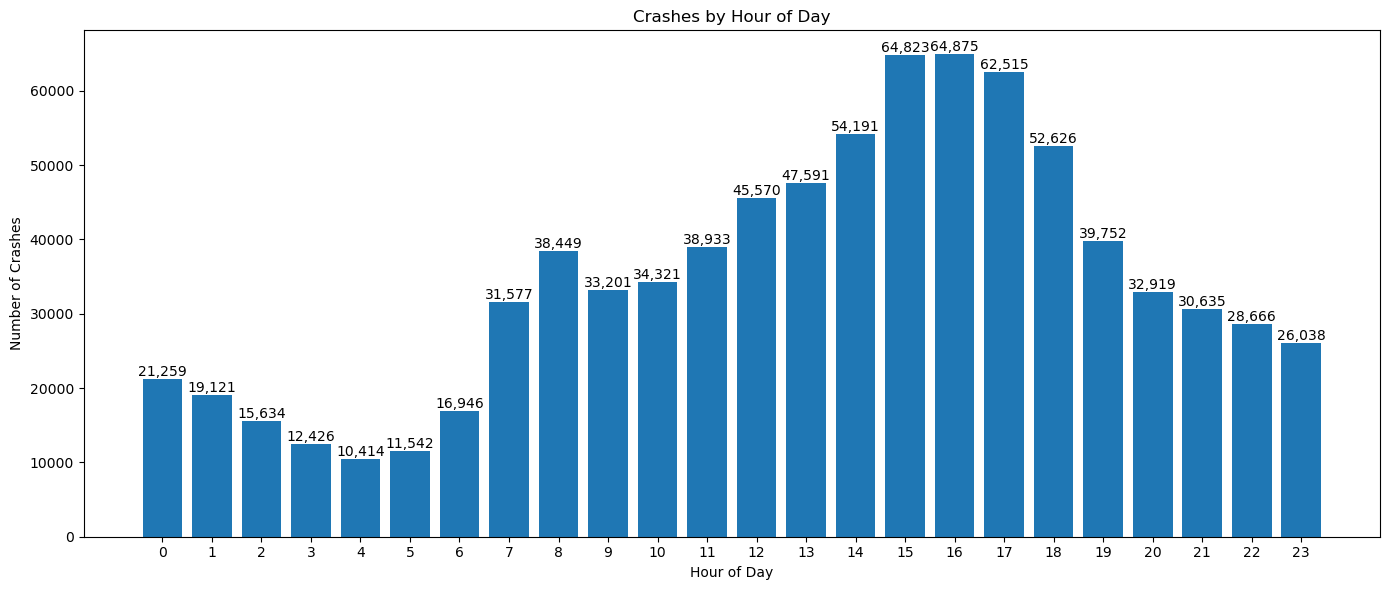

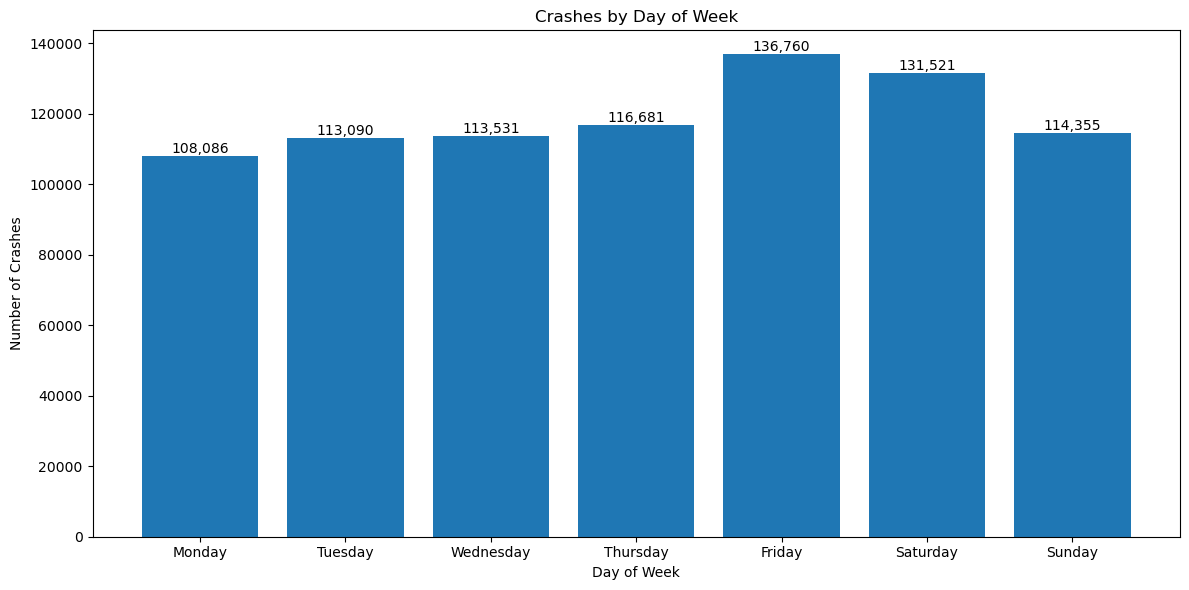

In [47]:
print("=== TEMPORAL ANALYSIS ===")

# Convert CrashDate to datetime if available
if 'CrashDate' in crash_df.columns:
    crash_df['CrashDate'] = pd.to_datetime(crash_df['CrashDate'], errors='coerce')
    
    # Extract temporal components
    crash_df['Year'] = crash_df['CrashDate'].dt.year
    crash_df['Month'] = crash_df['CrashDate'].dt.month
    crash_df['DayOfWeek'] = crash_df['CrashDate'].dt.day_name()
    
    # Plot crashes by year
    plt.figure(figsize=(12, 6))
    yearly_crashes = crash_df['Year'].value_counts().sort_index()
    bars = plt.bar(yearly_crashes.index.astype(str), yearly_crashes.values)
    plt.title('Crashes by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Crashes')
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Analyze by hour
if 'CrashHour' in crash_df.columns:
    plt.figure(figsize=(14, 6))
    hourly_crashes = crash_df['CrashHour'].value_counts().sort_index()
    bars = plt.bar(hourly_crashes.index.astype(str), hourly_crashes.values)
    plt.title('Crashes by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Crashes')
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Analyze by day of week
if 'DayOfWeek' in crash_df.columns:
    dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    dow_crashes = crash_df['DayOfWeek'].value_counts().reindex(dow_order)
    
    plt.figure(figsize=(12, 6))
    bars = plt.bar(dow_crashes.index, dow_crashes.values)
    plt.title('Crashes by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Number of Crashes')
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

=== CRASH SEVERITY ANALYSIS ===


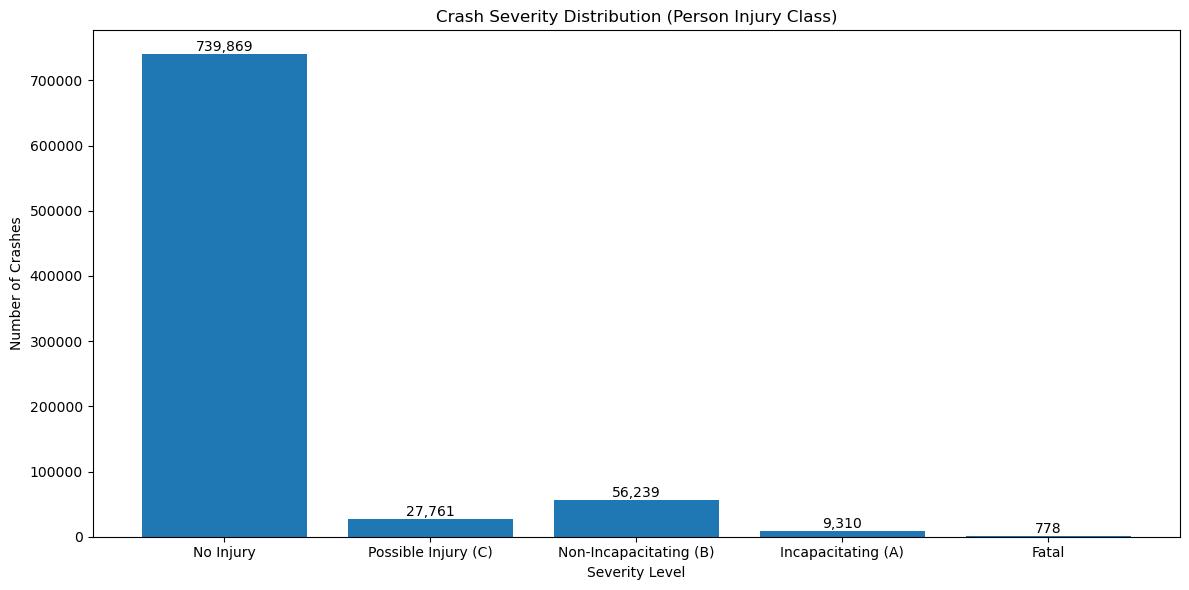

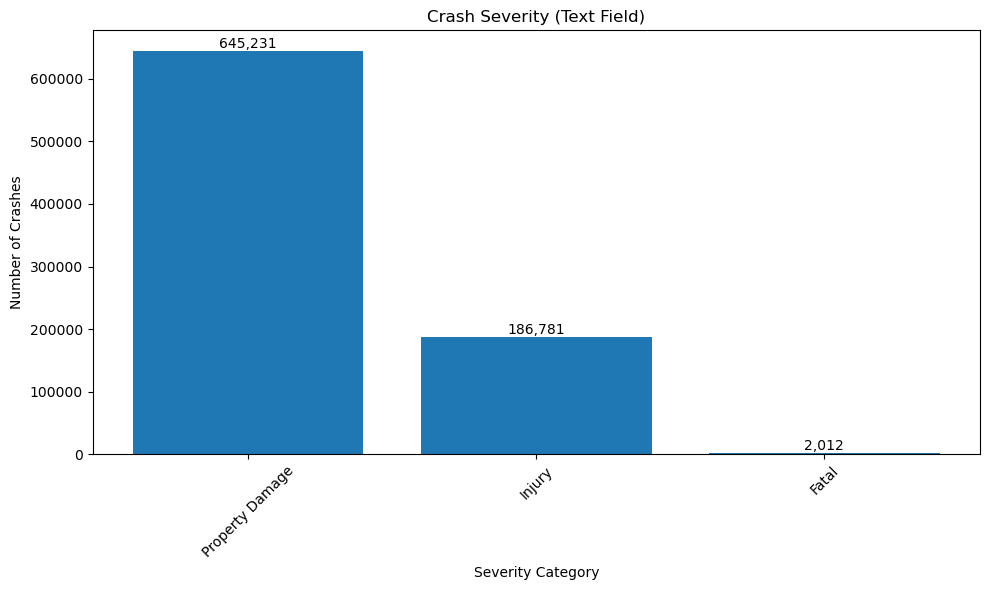

In [51]:
print("=== CRASH SEVERITY ANALYSIS ===")

# Analyze PersonInjuryClass
if 'PersonInjuryClass' in crash_df.columns:
    severity_names = {
        0: "No Injury",
        1: "Possible Injury (C)",
        2: "Non-Incapacitating (B)", 
        3: "Incapacitating (A)",
        4: "Fatal"
    }
    
    severity_counts = crash_df['PersonInjuryClass'].value_counts().sort_index()
    
    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(len(severity_counts)), severity_counts.values)
    plt.title('Crash Severity Distribution (Person Injury Class)')
    plt.xlabel('Severity Level')
    plt.ylabel('Number of Crashes')
    plt.xticks(range(len(severity_counts)), [severity_names.get(i, f"Code {i}") for i in severity_counts.index])
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Analyze CrashSeverity text field
if 'CrashSeverity' in crash_df.columns:
    plt.figure(figsize=(10, 6))
    severity_text_counts = crash_df['CrashSeverity'].value_counts()
    bars = plt.bar(severity_text_counts.index, severity_text_counts.values)
    plt.title('Crash Severity (Text Field)')
    plt.xlabel('Severity Category')
    plt.ylabel('Number of Crashes')
    plt.xticks(rotation=45)
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

=== COMMUNITY-BASED ANALYSIS ===


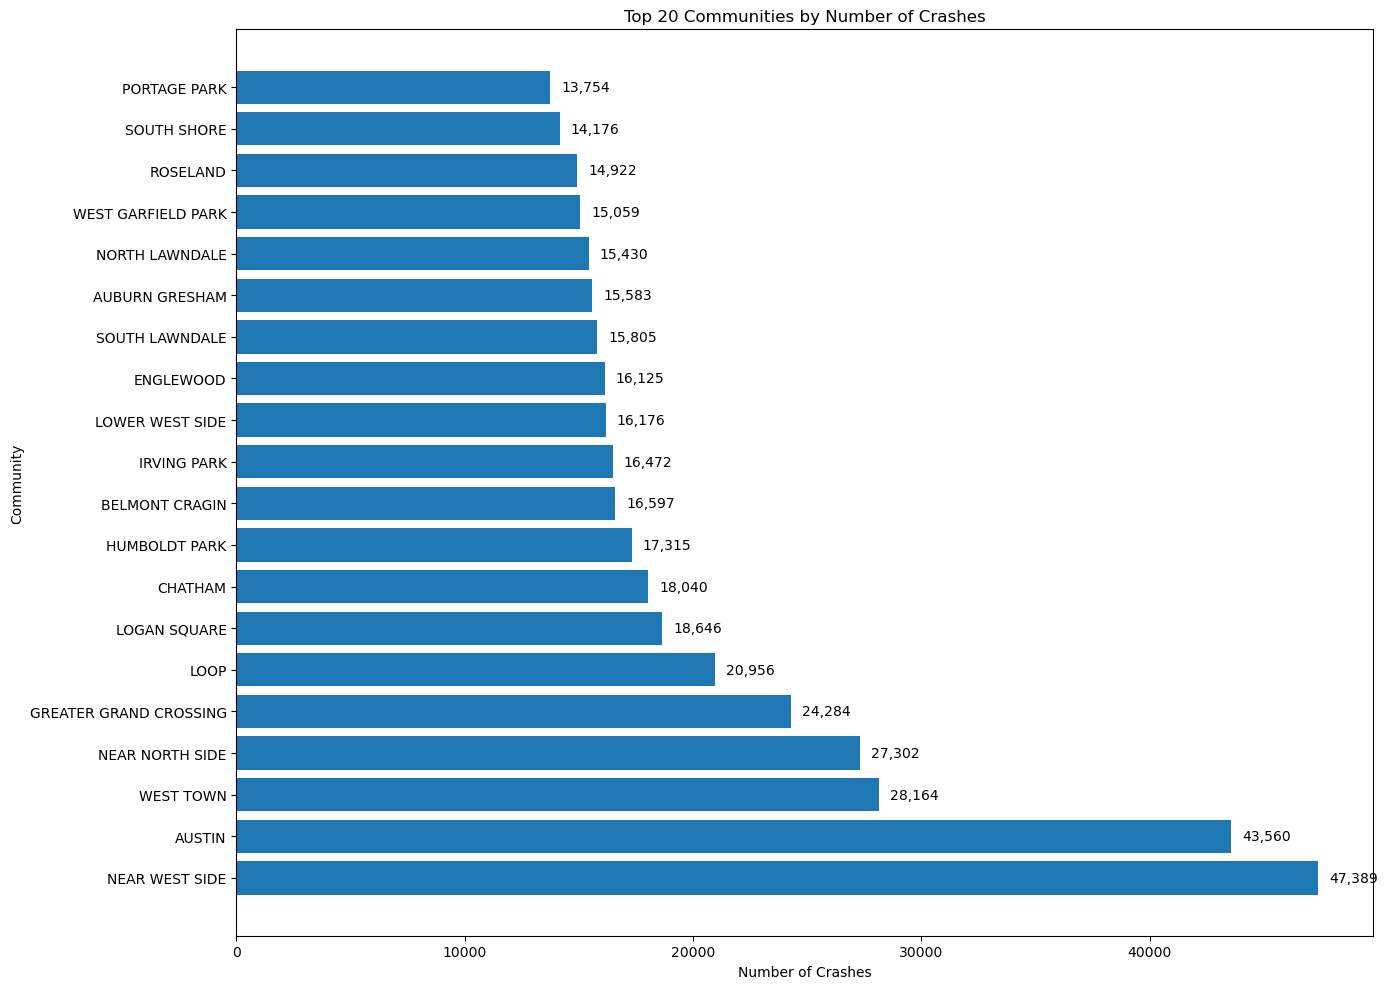

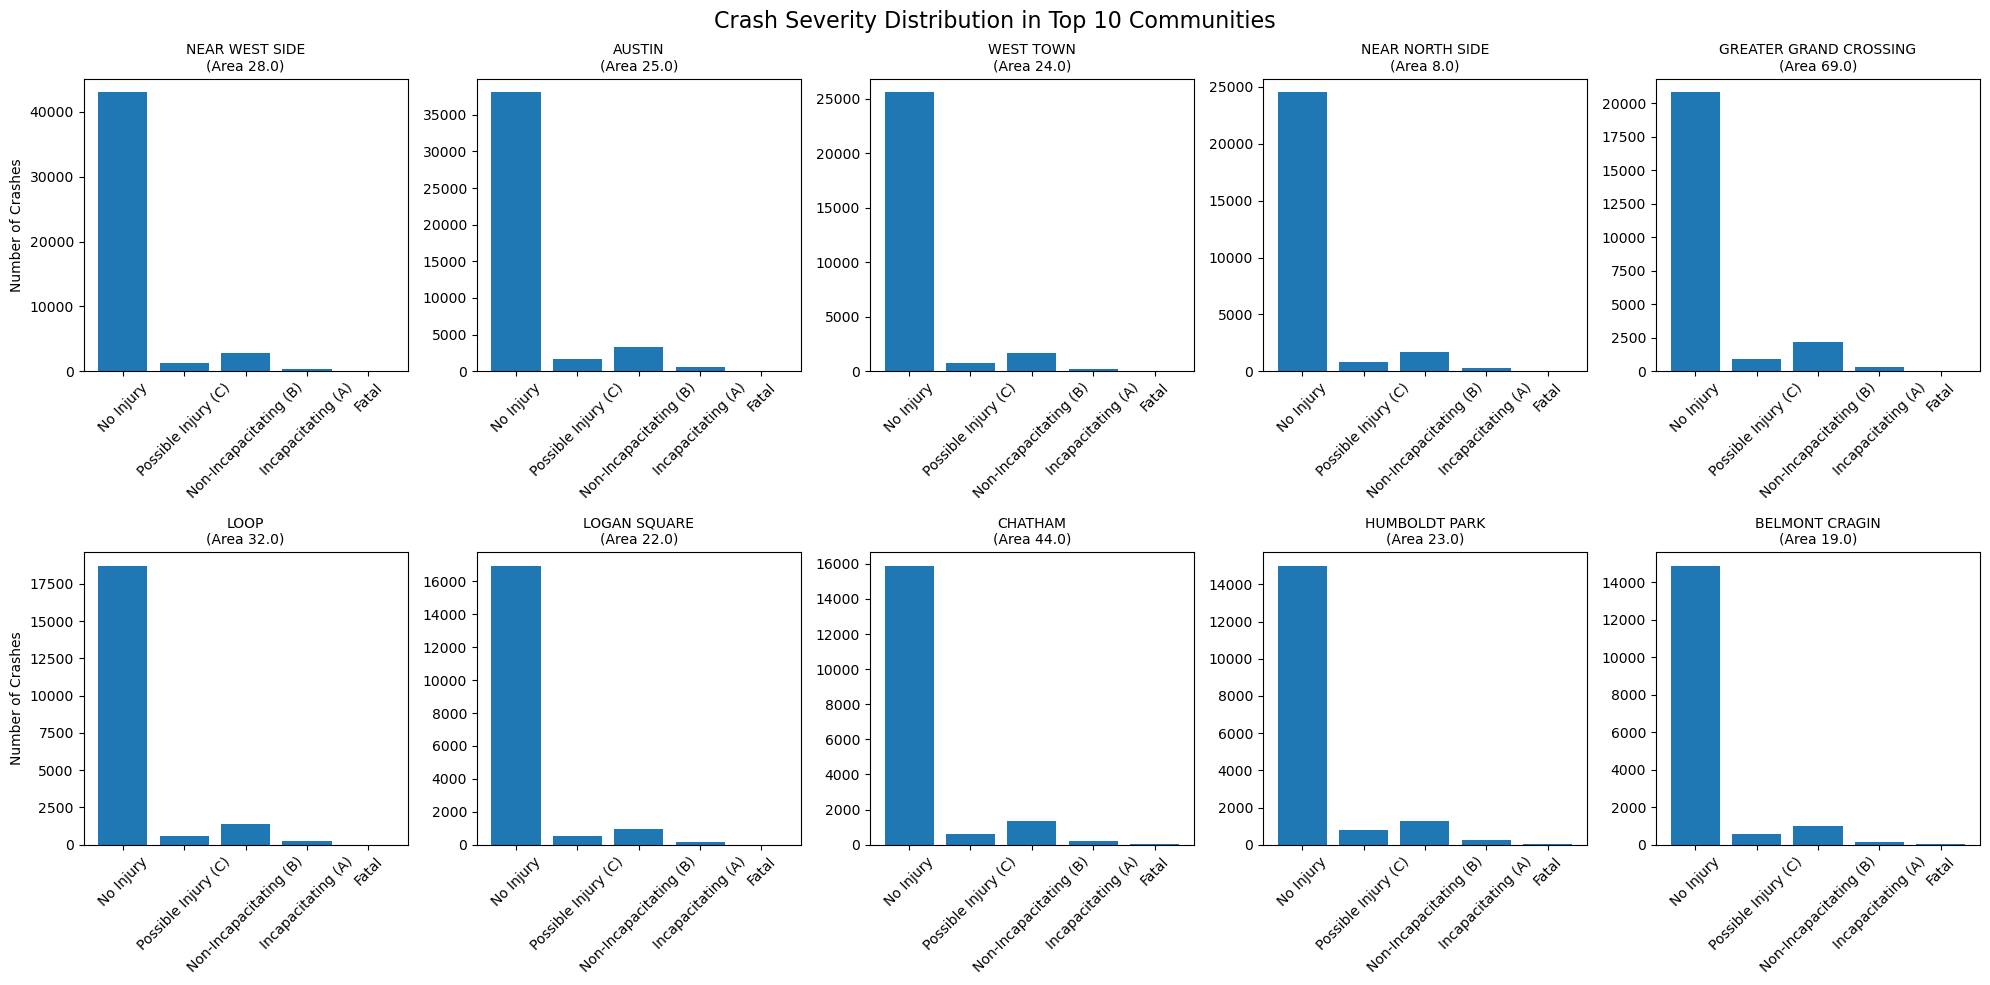

In [53]:
print("=== COMMUNITY-BASED ANALYSIS ===")

if 'area_numbe' in crash_df.columns and 'community' in crash_df.columns:
    # Count crashes by community
    crashes_by_community = crash_df['area_numbe'].value_counts().reset_index()
    crashes_by_community.columns = ['area_numbe', 'crash_count']
    
    # Get community names
    community_names = crash_df[['area_numbe', 'community']].drop_duplicates()
    community_analysis = crashes_by_community.merge(community_names, on='area_numbe')
    
    # Plot top communities
    plt.figure(figsize=(14, 10))
    top_communities = community_analysis.nlargest(20, 'crash_count')
    bars = plt.barh(top_communities['community'], top_communities['crash_count'])
    plt.title('Top 20 Communities by Number of Crashes')
    plt.xlabel('Number of Crashes')
    plt.ylabel('Community')
    
    for bar in bars:
        width = bar.get_width()
        plt.text(width + max(top_communities['crash_count']) * 0.01, bar.get_y() + bar.get_height()/2.,
                f'{int(width):,}', ha='left', va='center')
    
    plt.tight_layout()
    plt.show()
    
    # Analyze severity by community
    if 'PersonInjuryClass' in crash_df.columns:
        top_10_communities = community_analysis.nlargest(10, 'crash_count')
        
        fig, axes = plt.subplots(2, 5, figsize=(20, 10))
        axes = axes.flatten()
        
        for i, (_, row) in enumerate(top_10_communities.iterrows()):
            community_data = crash_df[crash_df['area_numbe'] == row['area_numbe']]
            severity_counts = community_data['PersonInjuryClass'].value_counts().sort_index()
            
            axes[i].bar(range(len(severity_counts)), severity_counts.values)
            axes[i].set_title(f"{row['community']}\n(Area {row['area_numbe']})", fontsize=10)
            axes[i].set_xticks(range(len(severity_counts)))
            axes[i].set_xticklabels([severity_names.get(i, f"{i}") for i in severity_counts.index], rotation=45)
            
            if i % 5 == 0:
                axes[i].set_ylabel('Number of Crashes')
        
        plt.suptitle('Crash Severity Distribution in Top 10 Communities', fontsize=16)
        plt.tight_layout()
        plt.show()

=== PERSON TYPE ANALYSIS ===


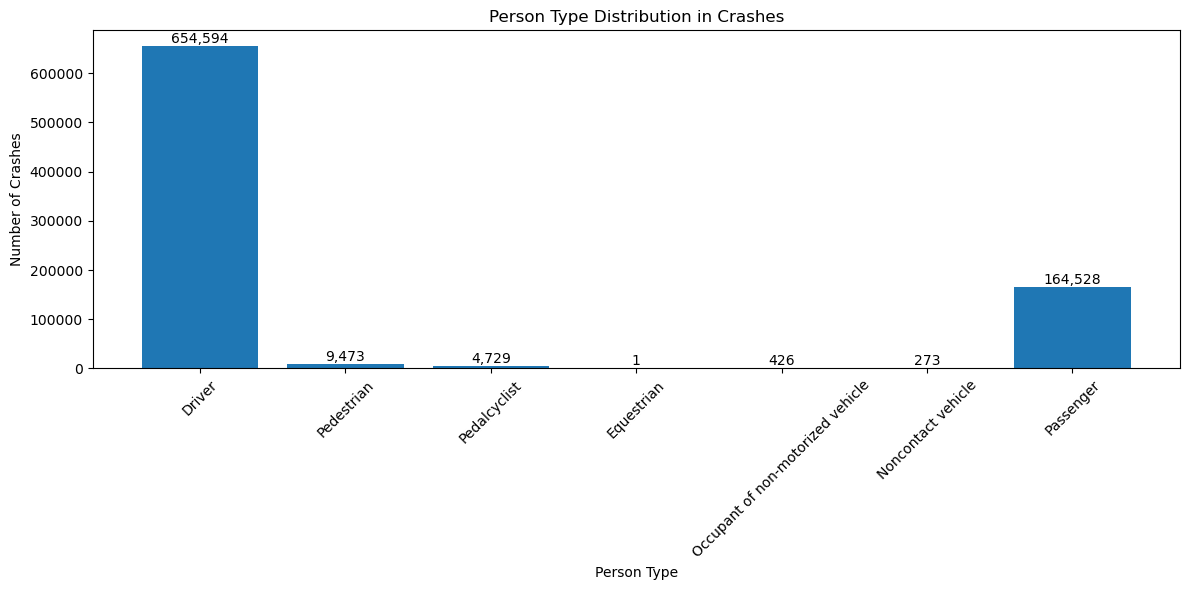

Pedestrian crashes: 9,473 (1.1%)
Bicycle crashes: 4,729 (0.6%)


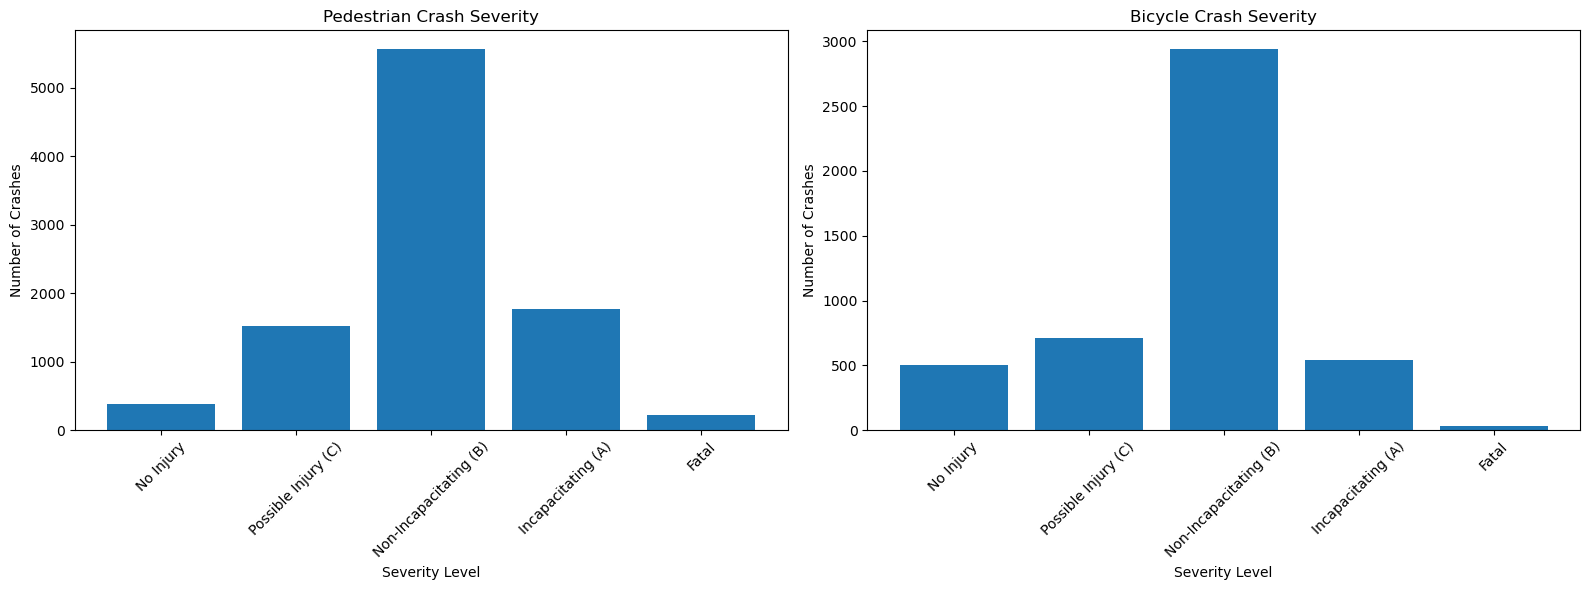

In [55]:
print("=== PERSON TYPE ANALYSIS ===")

if 'PersonTypeCode' in crash_df.columns:
    person_type_names = {
        1: "Driver",
        2: "Pedestrian", 
        3: "Pedalcyclist",
        4: "Equestrian",
        5: "Occupant of non-motorized vehicle",
        6: "Noncontact vehicle",
        7: "Passenger",
        16: "Disabled Vehicle"
    }
    
    person_type_counts = crash_df['PersonTypeCode'].value_counts().sort_index()
    
    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(len(person_type_counts)), person_type_counts.values)
    plt.title('Person Type Distribution in Crashes')
    plt.xlabel('Person Type')
    plt.ylabel('Number of Crashes')
    plt.xticks(range(len(person_type_counts)), [person_type_names.get(i, f"Code {i}") for i in person_type_counts.index], rotation=45)
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Focus on vulnerable road users
    pedestrian_crashes = crash_df[crash_df['PersonTypeCode'] == 2]
    bicycle_crashes = crash_df[crash_df['PersonTypeCode'] == 3]
    
    print(f"Pedestrian crashes: {len(pedestrian_crashes):,} ({len(pedestrian_crashes)/len(crash_df)*100:.1f}%)")
    print(f"Bicycle crashes: {len(bicycle_crashes):,} ({len(bicycle_crashes)/len(crash_df)*100:.1f}%)")
    
    # Analyze severity for vulnerable users
    if 'PersonInjuryClass' in crash_df.columns:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        # Pedestrian severity
        ped_severity = pedestrian_crashes['PersonInjuryClass'].value_counts().sort_index()
        ax1.bar(range(len(ped_severity)), ped_severity.values)
        ax1.set_title('Pedestrian Crash Severity')
        ax1.set_xlabel('Severity Level')
        ax1.set_ylabel('Number of Crashes')
        ax1.set_xticks(range(len(ped_severity)))
        ax1.set_xticklabels([severity_names.get(i, f"Code {i}") for i in ped_severity.index], rotation=45)
        
        # Bicycle severity
        bike_severity = bicycle_crashes['PersonInjuryClass'].value_counts().sort_index()
        ax2.bar(range(len(bike_severity)), bike_severity.values)
        ax2.set_title('Bicycle Crash Severity')
        ax2.set_xlabel('Severity Level')
        ax2.set_ylabel('Number of Crashes')
        ax2.set_xticks(range(len(bike_severity)))
        ax2.set_xticklabels([severity_names.get(i, f"Code {i}") for i in bike_severity.index], rotation=45)
        
        plt.tight_layout()
        plt.show()

=== CRASH CAUSES AND CONDITIONS ANALYSIS ===


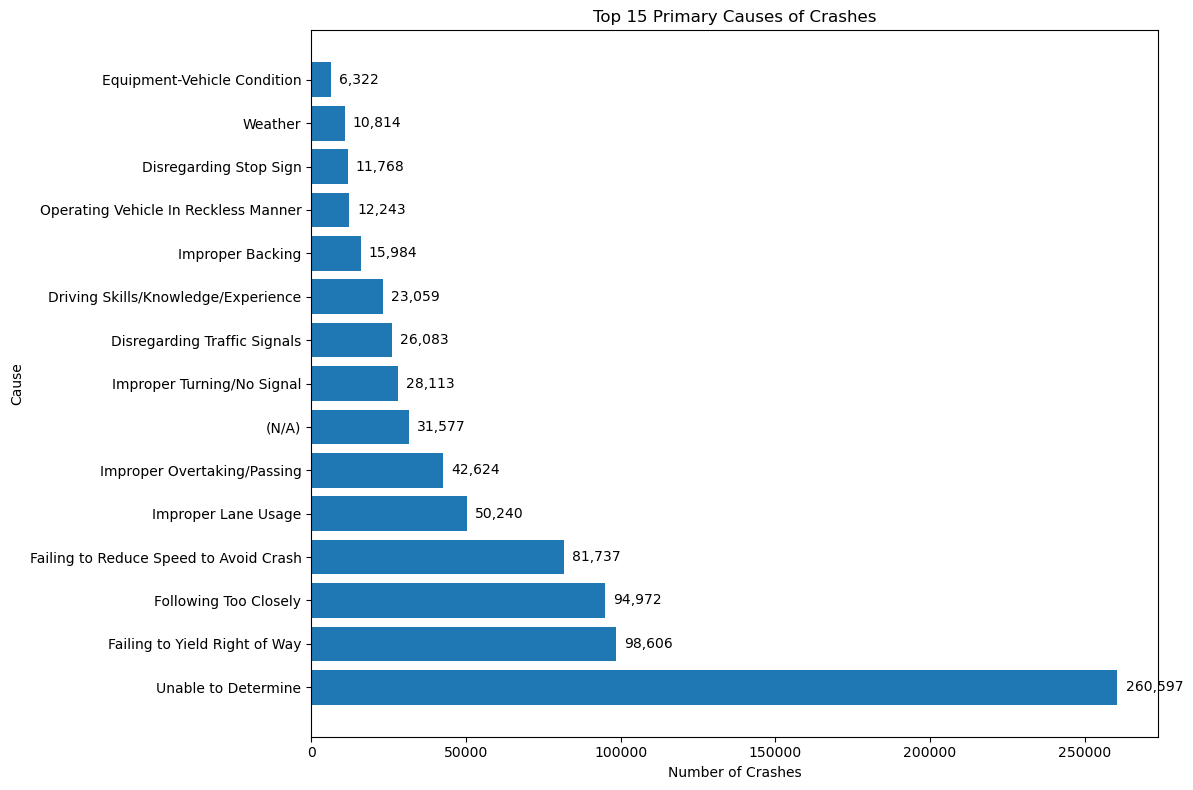

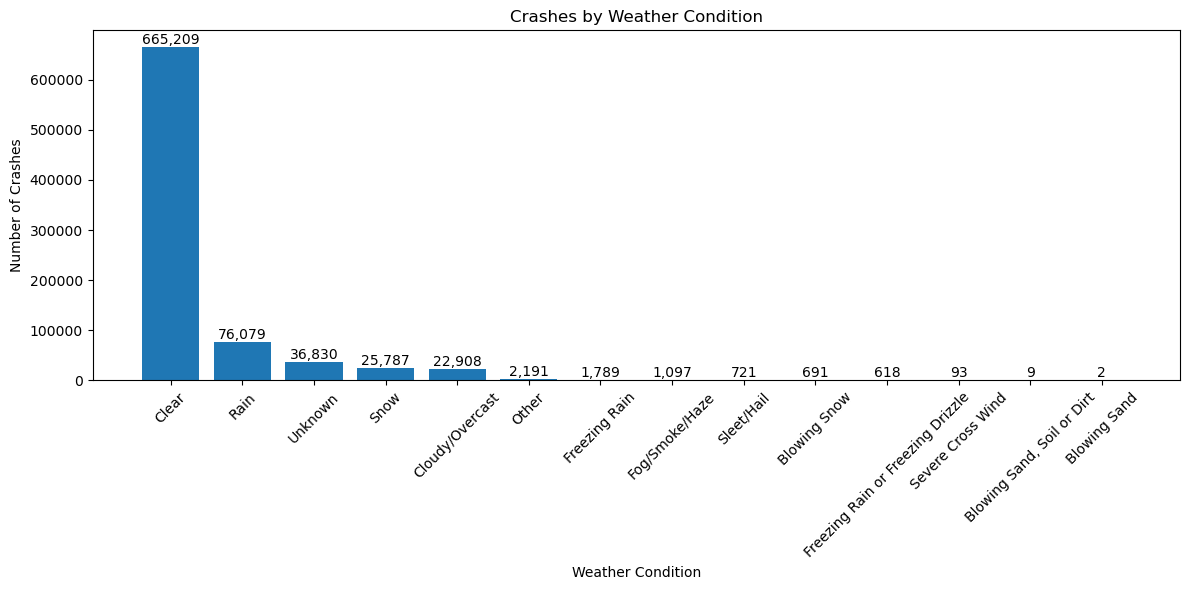

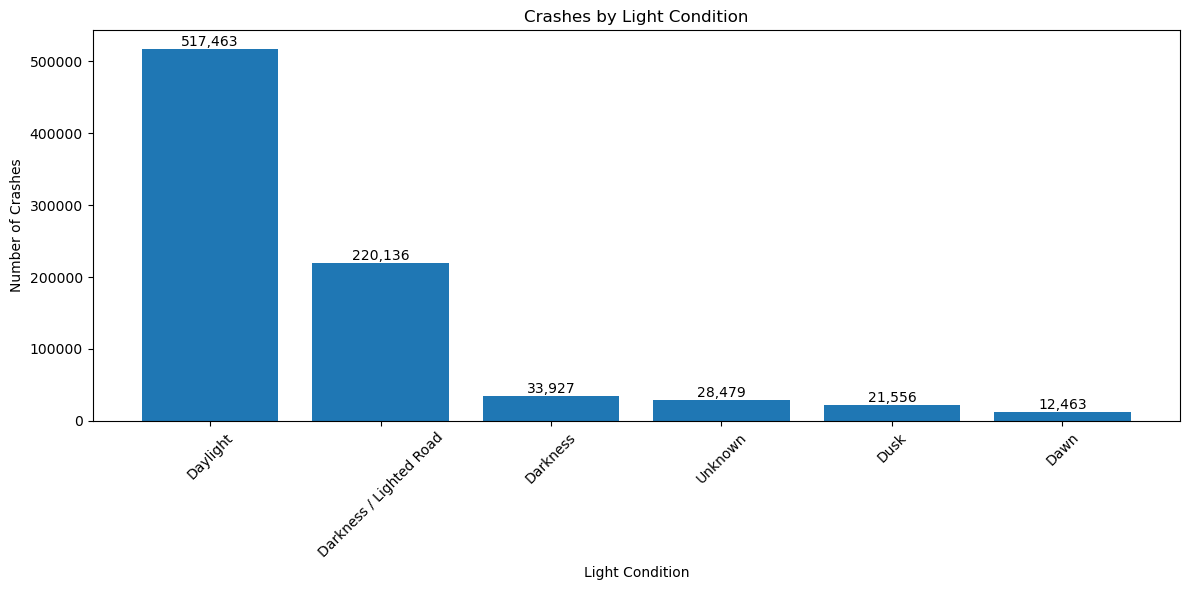

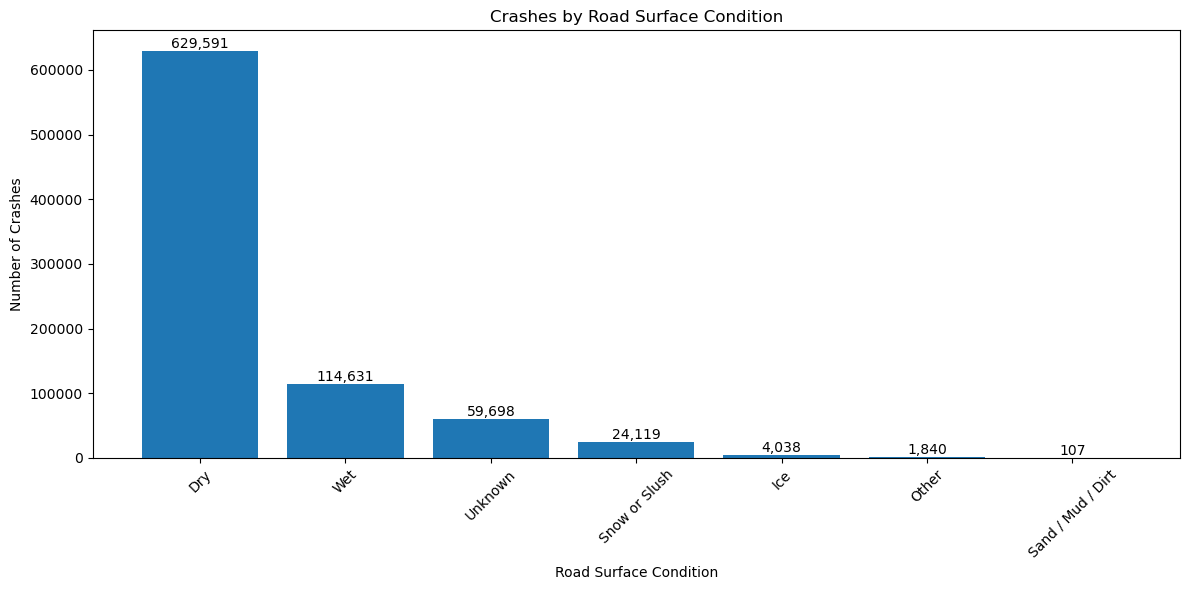

In [57]:
print("=== CRASH CAUSES AND CONDITIONS ANALYSIS ===")

# Analyze primary causes
if 'Cause1' in crash_df.columns:
    cause_counts = crash_df['Cause1'].value_counts().head(15)
    
    plt.figure(figsize=(12, 8))
    bars = plt.barh(range(len(cause_counts)), cause_counts.values)
    plt.title('Top 15 Primary Causes of Crashes')
    plt.xlabel('Number of Crashes')
    plt.ylabel('Cause')
    plt.yticks(range(len(cause_counts)), cause_counts.index)
    
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width + max(cause_counts.values) * 0.01, bar.get_y() + bar.get_height()/2.,
                f'{int(width):,}', ha='left', va='center')
    
    plt.tight_layout()
    plt.show()

# Analyze weather conditions
if 'WeatherCond' in crash_df.columns:
    weather_counts = crash_df['WeatherCond'].value_counts()
    
    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(len(weather_counts)), weather_counts.values)
    plt.title('Crashes by Weather Condition')
    plt.xlabel('Weather Condition')
    plt.ylabel('Number of Crashes')
    plt.xticks(range(len(weather_counts)), weather_counts.index, rotation=45)
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Analyze light conditions
if 'LightingCond' in crash_df.columns:
    light_counts = crash_df['LightingCond'].value_counts()
    
    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(len(light_counts)), light_counts.values)
    plt.title('Crashes by Light Condition')
    plt.xlabel('Light Condition')
    plt.ylabel('Number of Crashes')
    plt.xticks(range(len(light_counts)), light_counts.index, rotation=45)
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Analyze road surface conditions
if 'RoadSurfaceCond' in crash_df.columns:
    road_counts = crash_df['RoadSurfaceCond'].value_counts()
    
    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(len(road_counts)), road_counts.values)
    plt.title('Crashes by Road Surface Condition')
    plt.xlabel('Road Surface Condition')
    plt.ylabel('Number of Crashes')
    plt.xticks(range(len(road_counts)), road_counts.index, rotation=45)
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

print("=== ADVANCED ANALYSIS: CORRELATIONS AND TRENDS ===")

# Create a correlation matrix for numeric fields
numeric_cols = crash_df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 2:
    correlation_matrix = crash_df[numeric_cols].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Correlation Matrix of Numeric Variables')
    plt.tight_layout()
    plt.show()
    
    # Find strongest correlations
    print("Strongest correlations (> 0.3 or < -0.3):")
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr = correlation_matrix.iloc[i, j]
            if abs(corr) > 0.3:
                print(f"  {correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}: {corr:.3f}")

# Analyze trends over time
if 'Year' in crash_df.columns and 'PersonInjuryClass' in crash_df.columns:
    yearly_severity = crash_df.groupby(['Year', 'PersonInjuryClass']).size().unstack(fill_value=0)
    
    plt.figure(figsize=(14, 8))
    for severity in yearly_severity.columns:
        plt.plot(yearly_severity.index, yearly_severity[severity], marker='o', label=severity_names.get(severity, f"Severity {severity}"))
    
    plt.title('Crash Severity Trends Over Time')
    plt.xlabel('Year')
    plt.ylabel('Number of Crashes')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

=== ADVANCED ANALYSIS: CORRELATIONS AND TRENDS ===


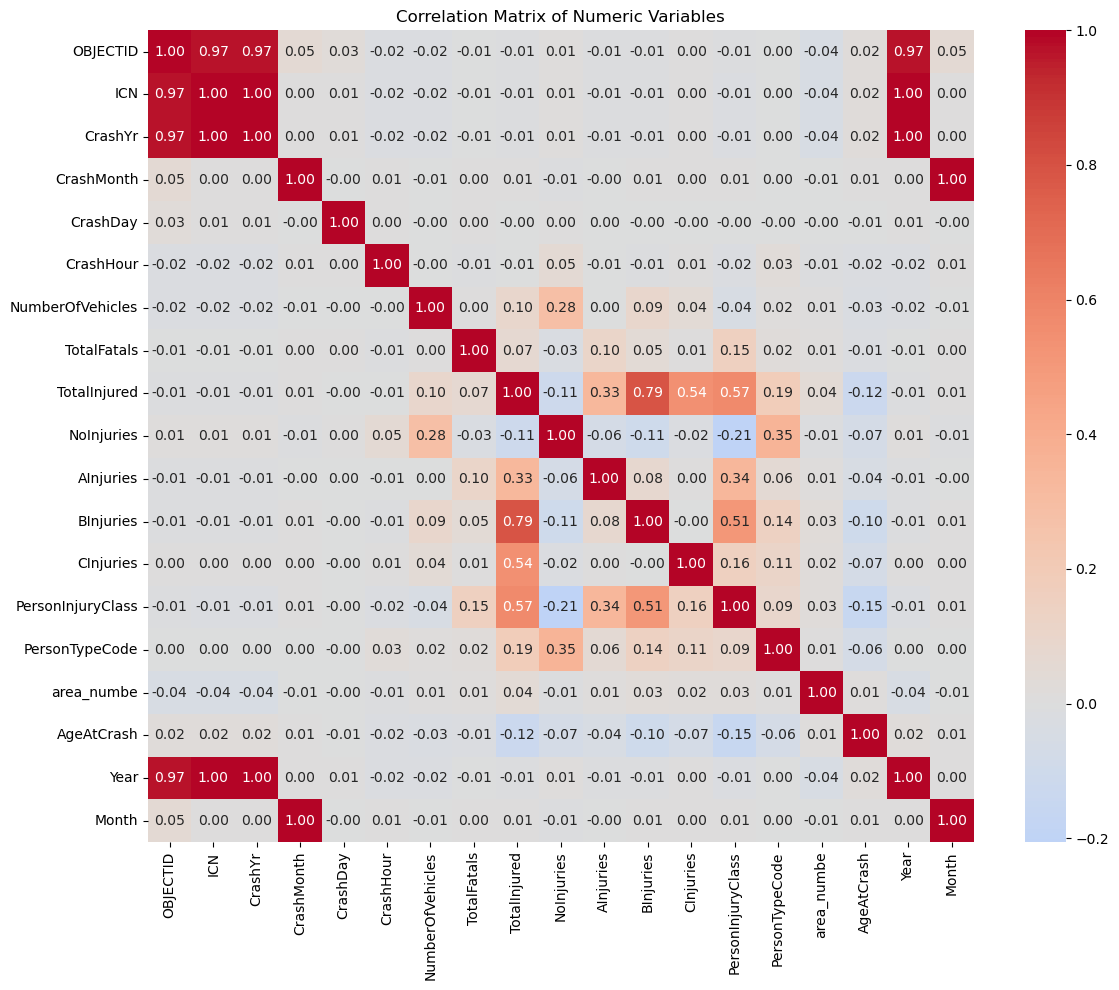

Strongest correlations (> 0.3 or < -0.3):
  OBJECTID - ICN: 0.967
  OBJECTID - CrashYr: 0.967
  OBJECTID - Year: 0.967
  ICN - CrashYr: 1.000
  ICN - Year: 1.000
  CrashYr - Year: 1.000
  CrashMonth - Month: 1.000
  TotalInjured - AInjuries: 0.332
  TotalInjured - BInjuries: 0.795
  TotalInjured - CInjuries: 0.543
  TotalInjured - PersonInjuryClass: 0.572
  NoInjuries - PersonTypeCode: 0.352
  AInjuries - PersonInjuryClass: 0.341
  BInjuries - PersonInjuryClass: 0.511


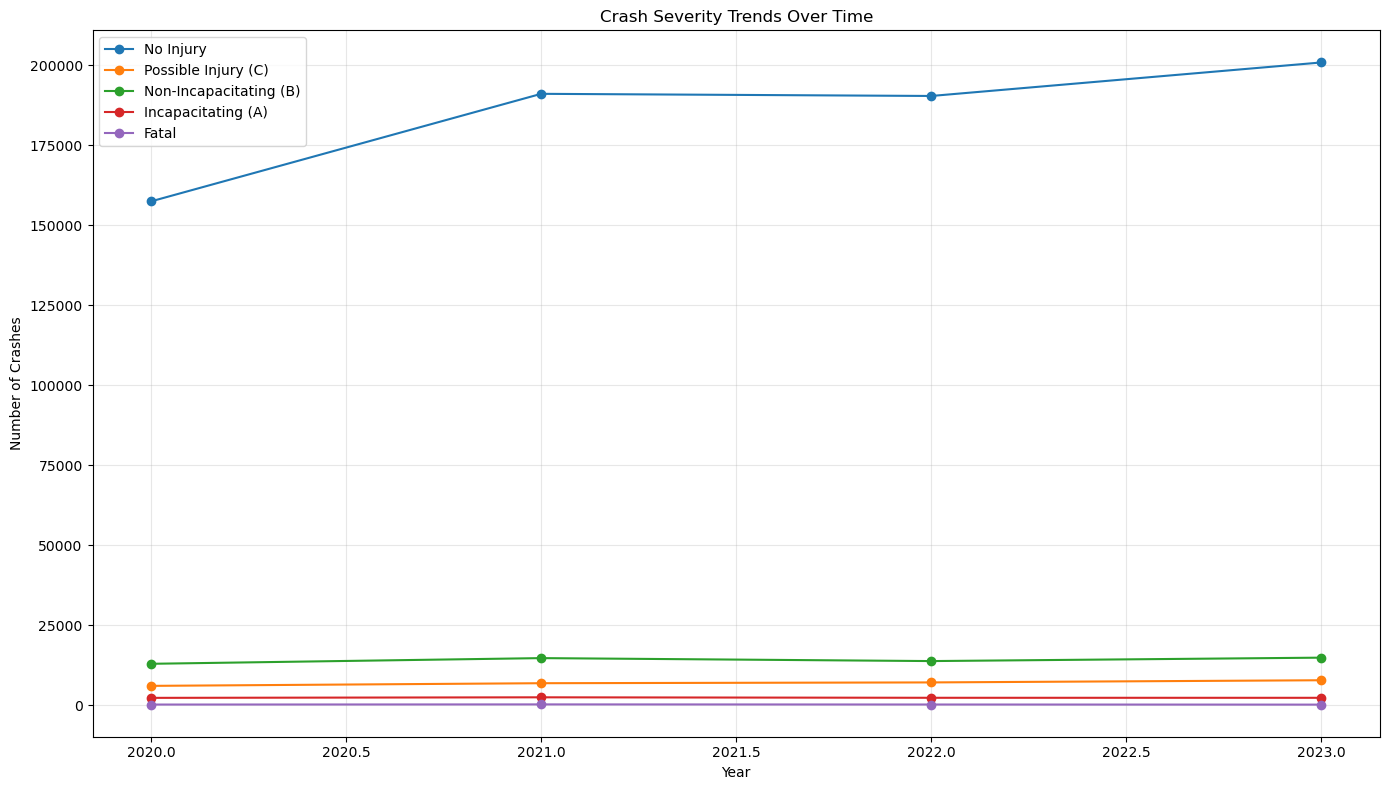

In [63]:
print("=== ADVANCED ANALYSIS: CORRELATIONS AND TRENDS ===")

# Create a correlation matrix for numeric fields
numeric_cols = crash_df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 2:
    correlation_matrix = crash_df[numeric_cols].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Correlation Matrix of Numeric Variables')
    plt.tight_layout()
    plt.show()
    
    # Find strongest correlations
    print("Strongest correlations (> 0.3 or < -0.3):")
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr = correlation_matrix.iloc[i, j]
            if abs(corr) > 0.3:
                print(f"  {correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}: {corr:.3f}")

# Analyze trends over time
if 'Year' in crash_df.columns and 'PersonInjuryClass' in crash_df.columns:
    yearly_severity = crash_df.groupby(['Year', 'PersonInjuryClass']).size().unstack(fill_value=0)
    
    plt.figure(figsize=(14, 8))
    for severity in yearly_severity.columns:
        plt.plot(yearly_severity.index, yearly_severity[severity], marker='o', label=severity_names.get(severity, f"Severity {severity}"))
    
    plt.title('Crash Severity Trends Over Time')
    plt.xlabel('Year')
    plt.ylabel('Number of Crashes')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [65]:
print("=== EXPORTING COMPREHENSIVE RESULTS ===")

# Create output directory
output_dir = r"C:\Users\MSI\OneDrive - Oklahoma A and M System\Data_thesis_Chicago\Analysis_Results"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Export all data
crash_df.to_csv(os.path.join(output_dir, "comprehensive_crash_analysis.csv"), index=False)
print(f"Exported comprehensive crash data with {len(crash_df)} records")

# Create detailed summary report
summary_stats = pd.DataFrame({
    'Metric': [
        'Total Crashes', 'Date Range', 'Number of Communities',
        'Fatal Crashes', 'Injury Crashes', 'Property Damage Only Crashes',
        'Pedestrian Crashes', 'Bicycle Crashes', 'Average Vehicles per Crash',
        'Most Common Crash Cause', 'Most Common Weather Condition'
    ],
    'Value': [
        len(crash_df),
        f"{crash_df['Year'].min()}-{crash_df['Year'].max()}" if 'Year' in crash_df.columns else 'Unknown',
        crash_df['area_numbe'].nunique() if 'area_numbe' in crash_df.columns else 'Unknown',
        len(crash_df[crash_df['PersonInjuryClass'] == 4]) if 'PersonInjuryClass' in crash_df.columns else 'Unknown',
        len(crash_df[crash_df['PersonInjuryClass'].isin([1, 2, 3])]) if 'PersonInjuryClass' in crash_df.columns else 'Unknown',
        len(crash_df[crash_df['PersonInjuryClass'] == 0]) if 'PersonInjuryClass' in crash_df.columns else 'Unknown',
        len(crash_df[crash_df['PersonTypeCode'] == 2]) if 'PersonTypeCode' in crash_df.columns else 'Unknown',
        len(crash_df[crash_df['PersonTypeCode'] == 3]) if 'PersonTypeCode' in crash_df.columns else 'Unknown',
        crash_df['NumberOfVehicles'].mean() if 'NumberOfVehicles' in crash_df.columns else 'Unknown',
        crash_df['Cause1'].mode()[0] if 'Cause1' in crash_df.columns else 'Unknown',
        crash_df['WeatherCond'].mode()[0] if 'WeatherCond' in crash_df.columns else 'Unknown'
    ]
})

summary_stats.to_csv(os.path.join(output_dir, "detailed_summary_statistics.csv"), index=False)

# Save all plots
plot_dir = os.path.join(output_dir, "Plots")
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

# Function to save current plot
def save_current_plot(filename):
    plt.savefig(os.path.join(plot_dir, filename), dpi=300, bbox_inches='tight')
    plt.close()

# Save key plots (recreate and save)
print("Saving all plots...")
# [You would add code here to recreate and save each plot]

print(f"All results exported to: {output_dir}")
print("\n=== COMPREHENSIVE ANALYSIS COMPLETE ===")
print("Summary of findings has been saved to CSV files and visualizations")

=== EXPORTING COMPREHENSIVE RESULTS ===
Exported comprehensive crash data with 834024 records
Saving all plots...
All results exported to: C:\Users\MSI\OneDrive - Oklahoma A and M System\Data_thesis_Chicago\Analysis_Results

=== COMPREHENSIVE ANALYSIS COMPLETE ===
Summary of findings has been saved to CSV files and visualizations
